# Medical Appointment No Shows
## Why do 30% of patients miss their scheduled appointments?

In [184]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(16,12)})


In [185]:
data = pd.read_csv('KaggleV2-May-2016.csv', date_parser=True)
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### First lets try to find how often patients doesn't show

In [187]:
# for that first change the data type of the No-show to category 
data['No-show'] = data['No-show'].astype('category')

In [188]:
data['No-show'].unique()

[No, Yes]
Categories (2, object): [No, Yes]

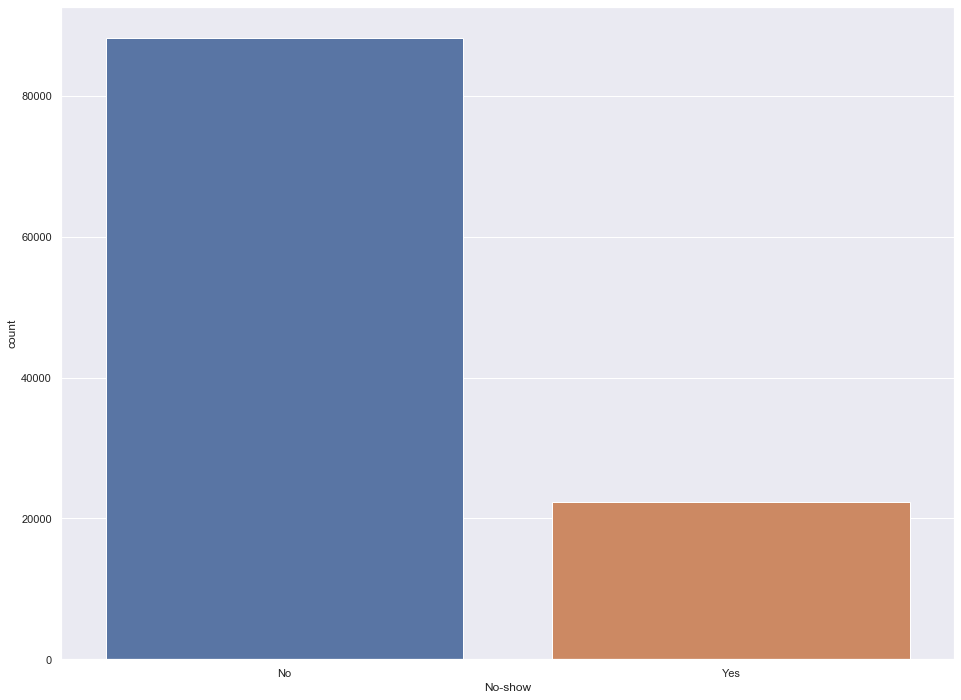

In [189]:

sns.countplot(data['No-show'])

From the graph the patients date who Do not show up on the appointment date is much lesser as compare to those who show up
More than 80K patients do show on the appointment date


#### let's change the data type of the given columns such as date which is in object type to datetime64 and 
#### Gender into the catergorical data so it will be easy to analysis based on gender

In [190]:
data.Gender = data.Gender.astype('category')    

In [191]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [192]:
data.ScheduledDay = pd.to_datetime(data.ScheduledDay)
data.AppointmentDay = pd.to_datetime(data.AppointmentDay)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null category
dtypes: category(2), datetime64[ns, UTC](2), float64(1), int64(8), object(1)
memory usage: 10.3+ MB


In [194]:
# drop the row which has negative age
data = data.drop(data[data['Age']<0].index)

data.Hipertension.value_counts()




0    88725
1    21801
Name: Hipertension, dtype: int64

In [195]:
data.Diabetes.value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [196]:
data.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [197]:
data.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

### let's change the dtypes of the columns which has category values

In [198]:
data.Scholarship =  data.Scholarship.astype('object')
data.Hipertension = data.Hipertension.astype('object')
data.Diabetes = data.Diabetes.astype('object')
data.Alcoholism = data.Alcoholism.astype('object')
data.SMS_received = data.SMS_received.astype('object')
data.Handcap = data.SMS_received.astype('object')

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null category
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null object
Hipertension      110526 non-null object
Diabetes          110526 non-null object
Alcoholism        110526 non-null object
Handcap           110526 non-null object
SMS_received      110526 non-null object
No-show           110526 non-null category
dtypes: category(2), datetime64[ns, UTC](2), float64(1), int64(2), object(7)
memory usage: 11.2+ MB


### let's find the weekdays from the dates given to us to explorate the no-shows according to the weekdays

In [255]:
data['Scheduled_Day'] = data['ScheduledDay'].dt.day_name()
data['Appointment_Day'] = data['AppointmentDay'].dt.day_name()
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Day,Appointment_Day,checking_date,checking_date2
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0.776481,-0.776481
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0.672535,-0.672535
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0.679907,-0.679907
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0.728831,-0.728831
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0.671794,-0.671794


### now let's find the relation betweeen days 

## here I tried to find the those days where appointment was scheduled and patients do not show who

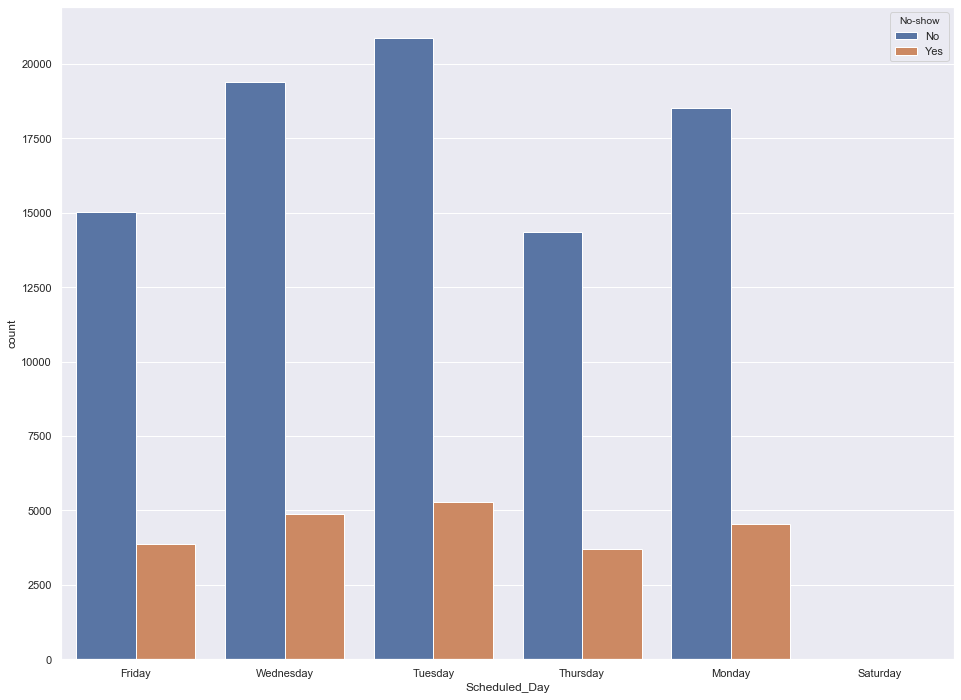

In [201]:
sns.countplot(data = data, hue='No-show',x='Scheduled_Day' )

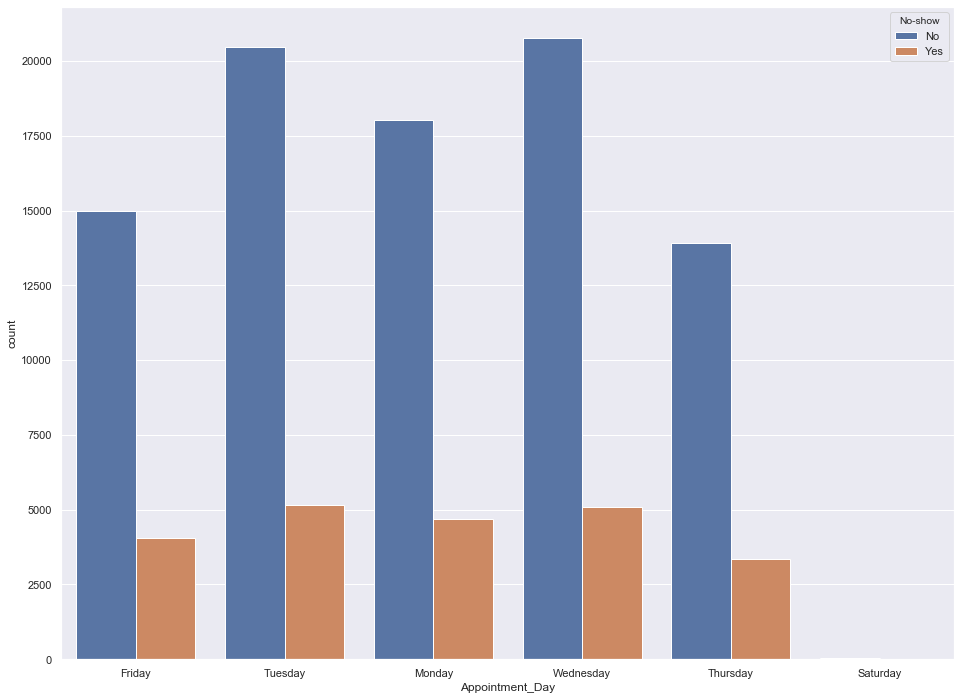

In [202]:
sns.countplot(data = data, hue='No-show',x='Appointment_Day' )

### from the these to figure values are not matching so lets try find the waiting time ..... checking Is the waiting time is negative 

In [203]:
data['checking_date'] = (data['ScheduledDay'] - data['AppointmentDay'])/np.timedelta64(1, 'D')
data['checking_date2'] = (data['AppointmentDay'] - data['ScheduledDay'])/np.timedelta64(1, 'D')

In [204]:
print('There is doubt with the data that to select which data regarding the date')
print('Total number of negative values present in dataset when ScheduledDay - AppointmentDay', data[data['checking_date']<0].checking_date.count())
print('Total number of negative values present in dataset when AppointmentDay-ScheduledDay', data[data['checking_date2']<0].checking_date2.count())


There is doubt with the data that to select which data regarding the date
Total number of negative values present in dataset when ScheduledDay - AppointmentDay 71959
Total number of negative values present in dataset when AppointmentDay-ScheduledDay 38567


### from above it is clear that the both the data with scheduledDay and AppointmentDay is huge but let's take data with less negative value since the our dataset has 30% of the no show rate 

## Now we tried  find the relation between gender and noshow with Hue

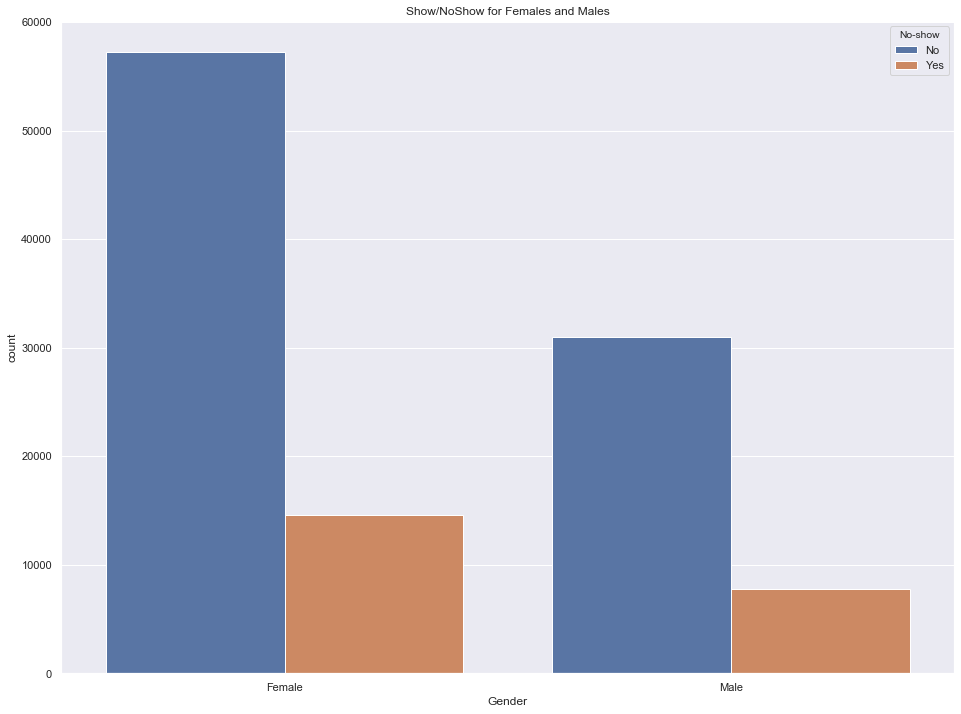

In [205]:
ax = sns.countplot(x=data.Gender, hue=data['No-show'])
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## now let's find the variation in age with the use of boxplot

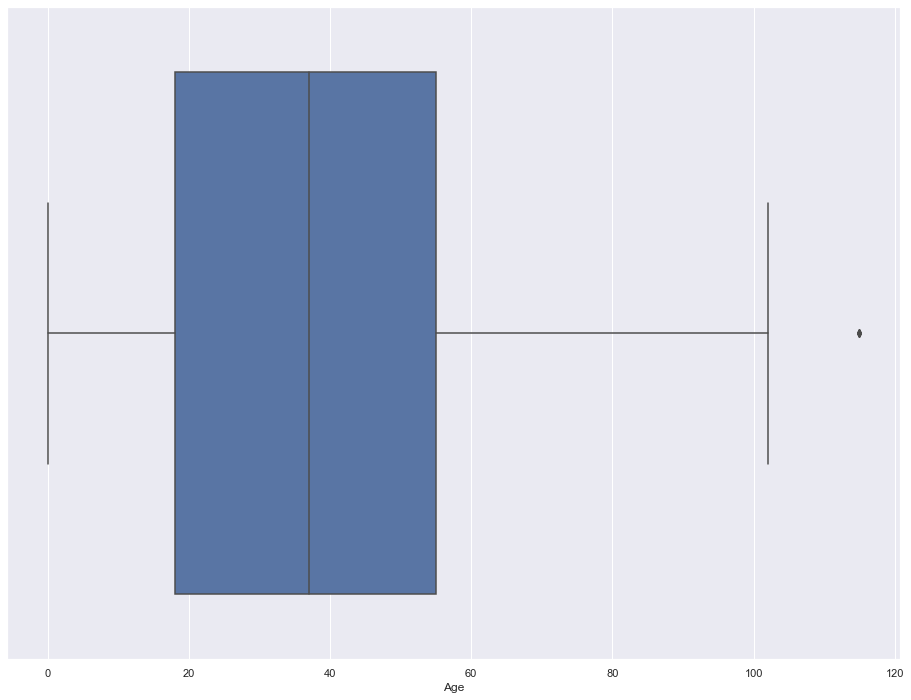

In [206]:
sns.boxplot(data.Age)


### so from the boxplot it is clear that the age is mostly ranges from 18-54

## now let's check the Neighbourhood effect on the no-show

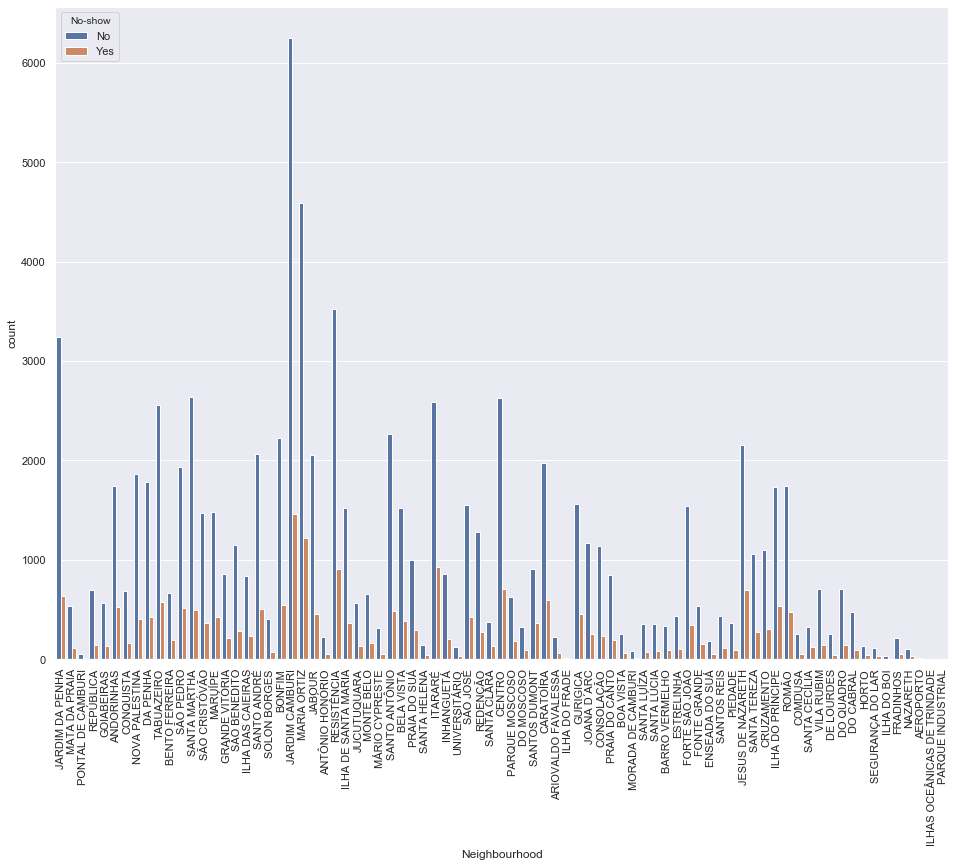

In [210]:
plt.xticks(rotation=90)
sns.countplot(x='Neighbourhood', data=data, hue='No-show')

 It seems that more patient are from 'JARDIM CAMBURI' & 'Maria oratiz' and they have more number of  no show than others 

[Text(0, 0, 'No Scholarship'), Text(0, 0, 'Scholarship')]

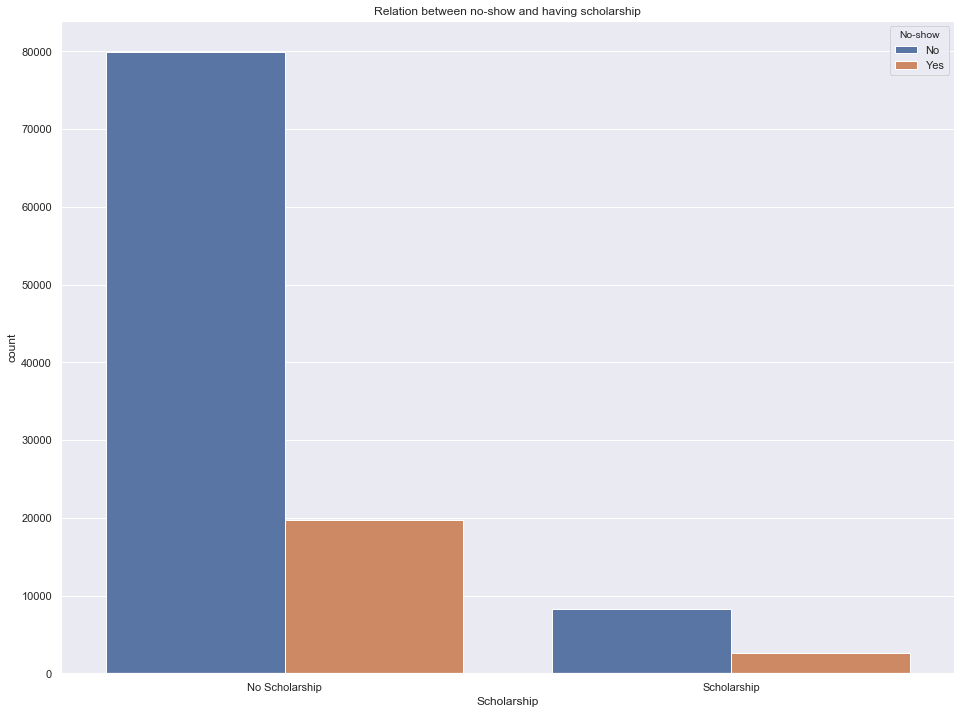

In [223]:
ax = sns.countplot(x=data.Scholarship, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No Scholarship', 'Scholarship'])



[Text(0, 0, 'No Hipertension'), Text(0, 0, 'Hipertension')]

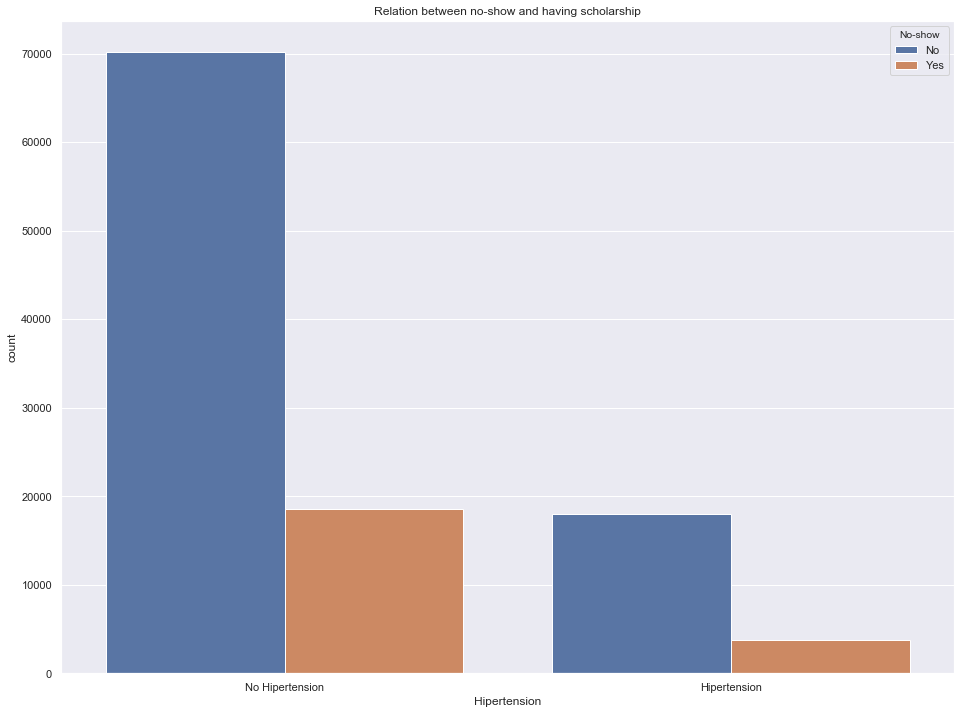

In [225]:
ax = sns.countplot(x=data.Hipertension, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No Hipertension', 'Hipertension'])


[Text(0, 0, 'No Diabetes'), Text(0, 0, 'Diabetes')]

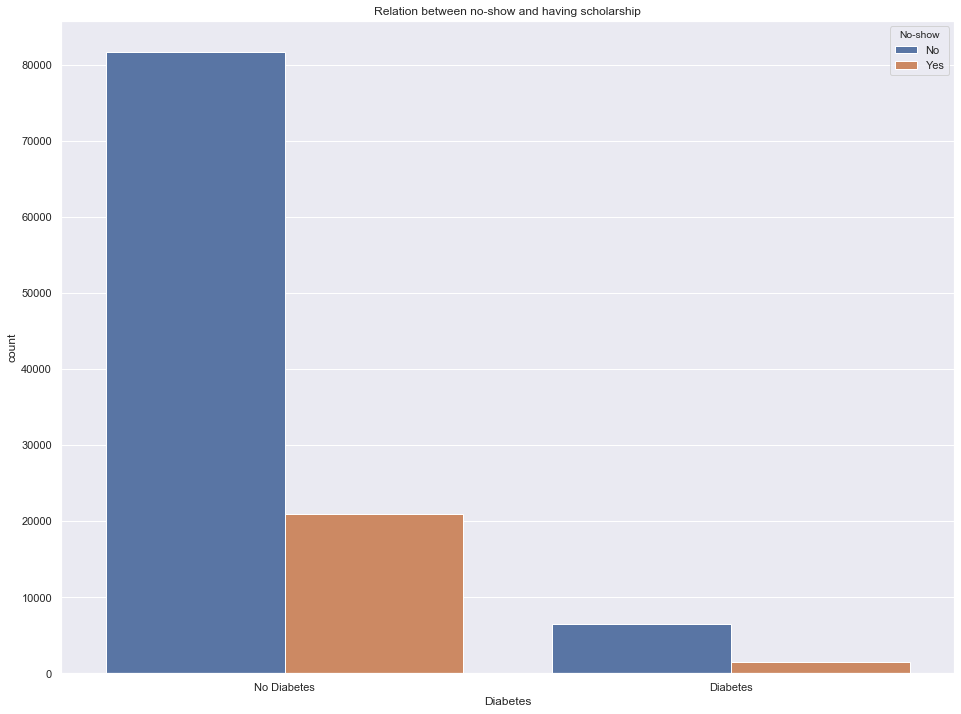

In [226]:
ax = sns.countplot(x=data.Diabetes, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

[Text(0, 0, 'No Alcoholism'), Text(0, 0, 'Alcoholism')]

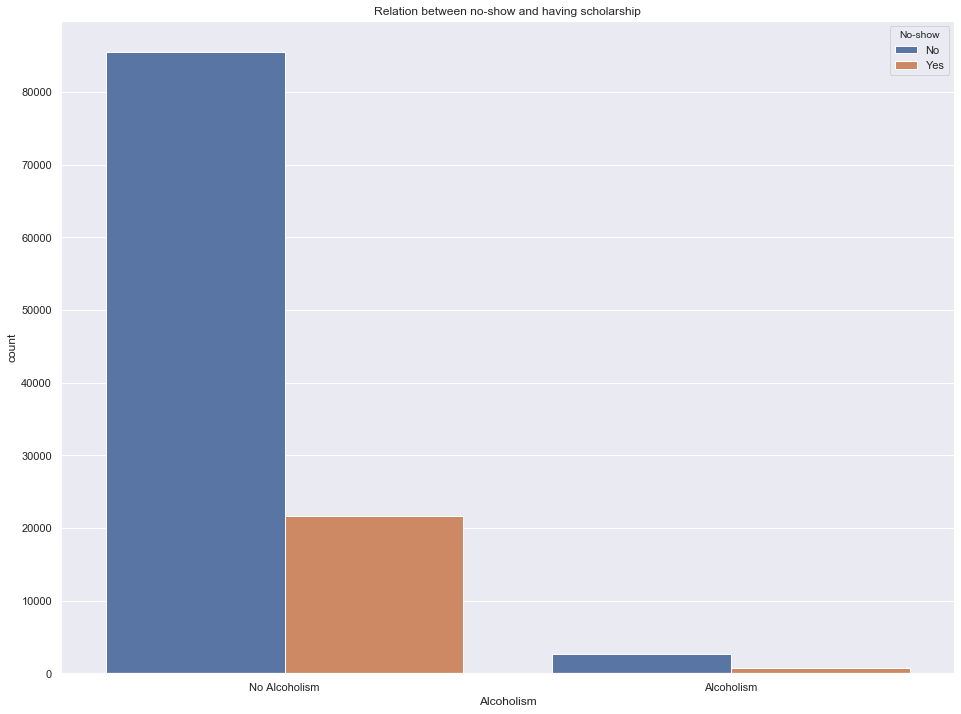

In [227]:
ax = sns.countplot(x=data.Alcoholism, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No Alcoholism', 'Alcoholism'])

[Text(0, 0, 'No Handcap'), Text(0, 0, 'Handcap')]

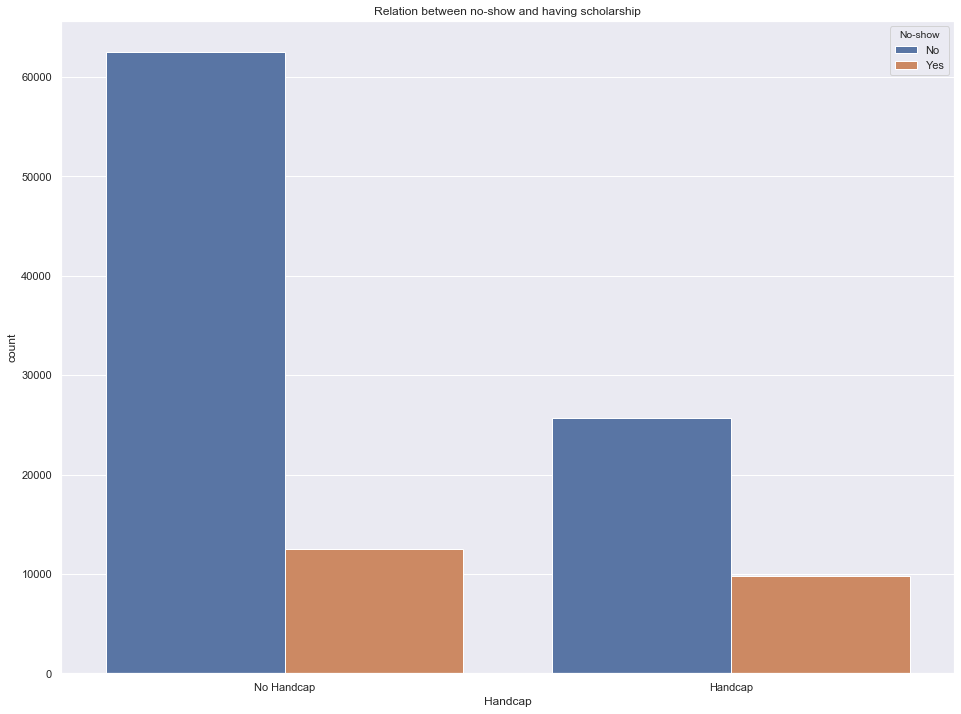

In [228]:
ax = sns.countplot(x=data.Handcap, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No Handcap', 'Handcap'])

[Text(0, 0, 'No SMS_received'), Text(0, 0, 'SMS_received')]

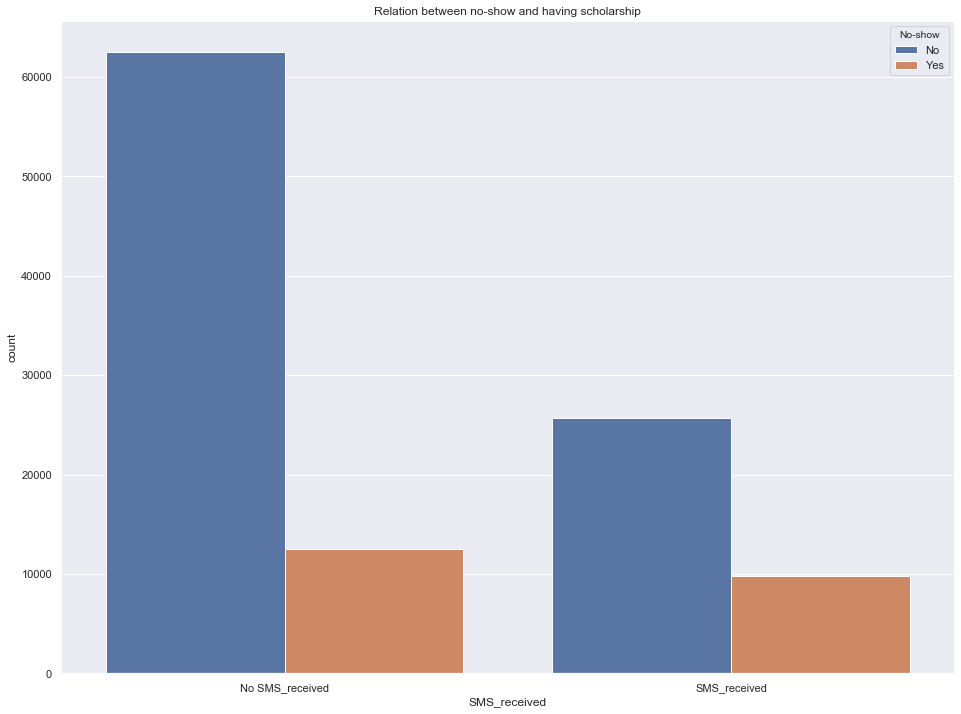

In [229]:
ax = sns.countplot(x=data.SMS_received, hue=data['No-show'], data=data)
ax.set_title('Relation between no-show and having scholarship')
ax.set_xticklabels(['No SMS_received', 'SMS_received'])

# now let's calculate ratio 

###### Following are the plots of the ratio with Neighbourhood, Scholarship, Hipertension ,Diabetes, Alcoholism,    Handcap,SMS_received and it's no show values. 

In [310]:
def ratio_variable(variable_):
    df_ratio = data[data['No-show']=='No'].groupby(variable_).size() /data.groupby(variable_).size()
    sns.set(rc={'figure.figsize':(8,6)})
    if variable_ == 'Neighbourhood':
        sns.set(rc={'figure.figsize':(16, 12)})
        plt.xticks(rotation=90)
    ax = sns.barplot(x = df_ratio.index, y = df_ratio, palette='winter_r' )
    ax.set_title("Show Percentage for "+variable_)
    plt.show()

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
PatientId          110526 non-null float64
AppointmentID      110526 non-null int64
Gender             110526 non-null category
ScheduledDay       110526 non-null datetime64[ns, UTC]
AppointmentDay     110526 non-null datetime64[ns, UTC]
Age                110526 non-null int64
Neighbourhood      110526 non-null object
Scholarship        110526 non-null object
Hipertension       110526 non-null object
Diabetes           110526 non-null object
Alcoholism         110526 non-null object
Handcap            110526 non-null object
SMS_received       110526 non-null object
No-show            110526 non-null category
Scheduled_Day      110526 non-null object
Appointment_Day    110526 non-null object
checking_date      110526 non-null float64
checking_date2     110526 non-null float64
dtypes: category(2), datetime64[ns, UTC](2), float64(3), int64(2), object(9)
memory usage: 19.5+ MB


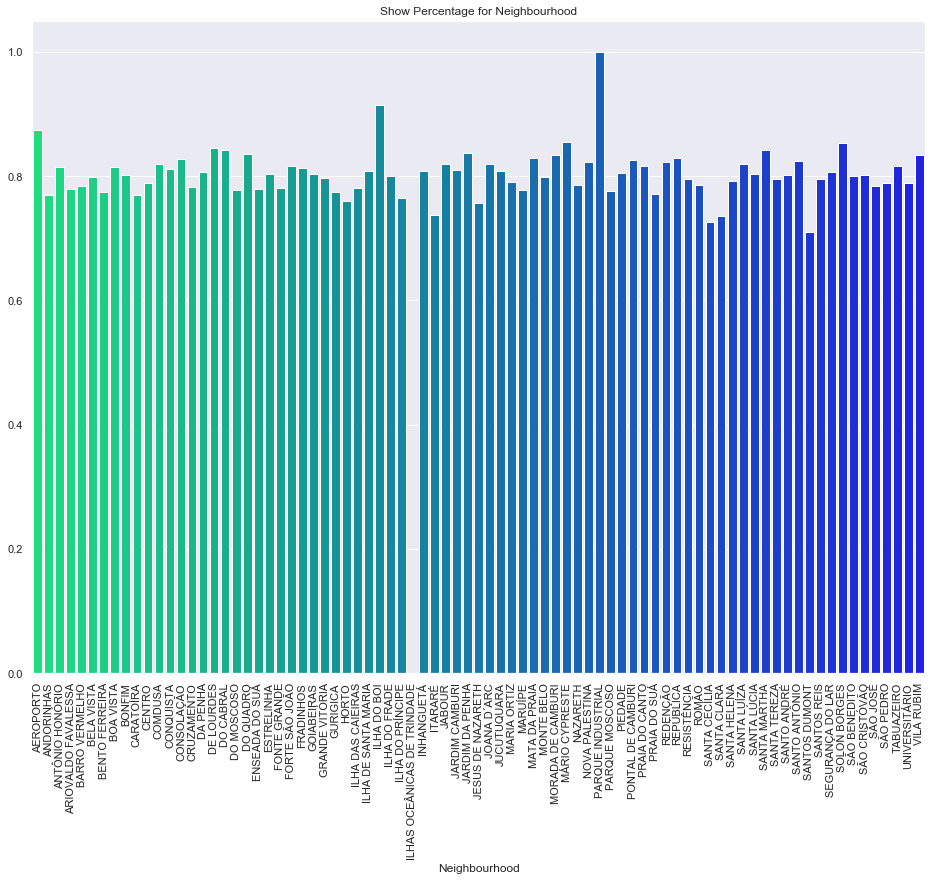

In [311]:
ratio_variable('Neighbourhood')


In this plot I tried to find the ratio of neighbourhood which don't show to the total data of neighbourhood it looks like PARQUE INDUSTRIAL is the place where ratio is 1 means patient from this neighbourhood has high chances of not showing on the appointment

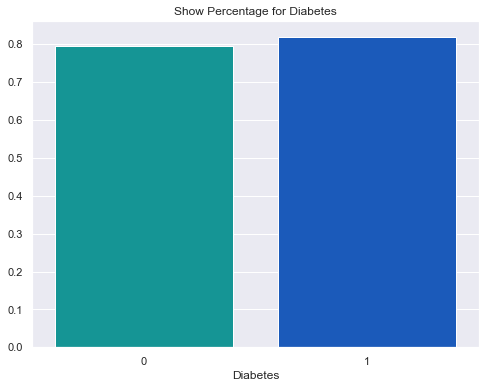

In [312]:
ratio_variable('Diabetes')


###### From this graph it is clear that patients who has diabetes generally don't show but the difference is not that big so it is not clear from this the behaviour of the Patients with diabetes

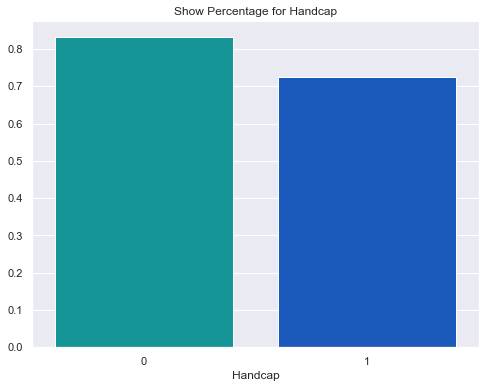

In [313]:
ratio_variable('Handcap')

###### From this graph person with no handcap has more chances of not showing up

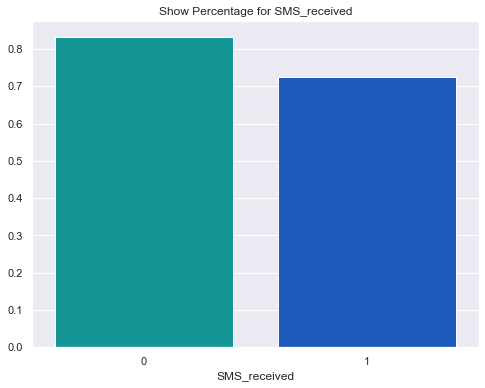

In [314]:
ratio_variable('SMS_received')

###### more people don't recieves SMS has less chances of showing up 

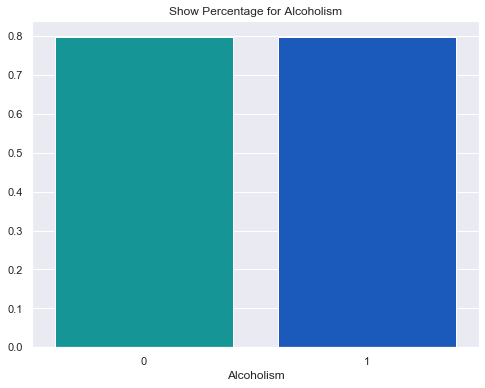

In [315]:
ratio_variable('Alcoholism')

###### From graph it is clear that alcoholism don't really effects the patient since both the ratio is equal 

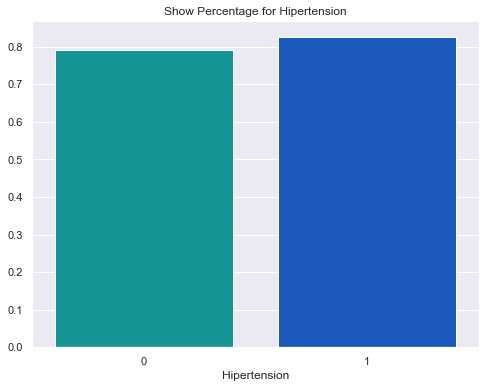

In [316]:
ratio_variable('Hipertension')

###### from graph Patient with hipertension has higher chances of not showing on the appointment

,PatientId,AppointmentID,Age,checking_date,checking_date2
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,-9.714376,9.714376
std,2.560943e+14,7.129544e+04,23.110026,15.244112,15.244112
min,3.921784e+04,5.030230e+06,0.000000,-178.554873,-6.575926
25%,4.172536e+12,5.640285e+06,18.000000,-14.320576,-0.346157
50%,3.173184e+13,5.680572e+06,37.000000,-3.473993,3.473993
75%,9.438963e+13,5.725523e+06,55.000000,0.346157,14.320576
max,9.999816e+14,5.790484e+06,115.000000,6.575926,178.554873
